In [0]:
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential
from keras.models import model_from_json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [0]:
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [0]:
dataset=pd.read_csv("/content/Dataset_KPCA_Prototype.csv")
dataset=dataset.to_numpy()

In [0]:
# split into input (X) and output (Y) variables
X = dataset[:,0:2]
Y = dataset[:,2]

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, shuffle=True)

In [0]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=2, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
# Fit the model
history = model.fit(X_train, Y_train, validation_split=0.50, epochs=150, batch_size=10, verbose=0)

In [0]:
#Y_test = Y_test[np.isfinite(Y_test)]

In [0]:
# make class predictions and get parameters with the model
Y_pred = model.predict_classes(X_test)

In [0]:
# summarize the first 150 cases
for i in range(150):
	print('%s => %d (expected %d)' % (X_test[i].tolist(), Y_pred[i], Y_test[i]))

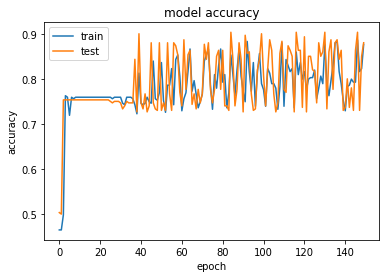

In [299]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show() 

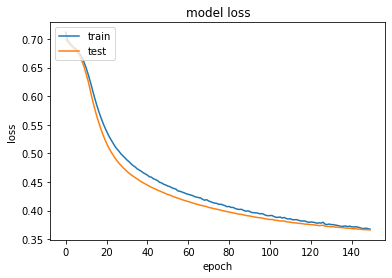

In [300]:
#summarize history for loss 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [301]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Y_test, Y_pred)
print('Accuracy:' ,accuracy*100)
# precision tp / (tp + fp)
precision = precision_score(Y_test, Y_pred)
print('Precision: %f', precision*100)
# recall: tp / (tp + fn)
recall = recall_score(Y_test, Y_pred)
print('Recall: %f', recall*100)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, Y_pred)
print('F1 score: %f',f1)
 # kappa
kappa = cohen_kappa_score(Y_test, Y_pred)
print('Cohens kappa: %f', kappa)
# ROC AUC
auc_1 = roc_auc_score(Y_test, Y_pred)
print('ROC AUC: %f', auc_1)
# confusion matrix
matrix = confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix' , matrix)
# MAE
mae = mean_absolute_error(Y_test, Y_pred)
print('Mean Absolute Error', mae)
#RMSE
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
print('Root Mean Squared Error', rmse)

Accuracy: 87.14524207011685
Precision: %f 100.0
Recall: %f 73.80952380952381
F1 score: %f 0.8493150684931507
Cohens kappa: %f 0.7415977097141064
ROC AUC: %f 0.8690476190476191
Confusion Matrix [[305   0]
 [ 77 217]]
Mean Absolute Error 0.1285475792988314
Root Mean Squared Error 0.3585353250362249


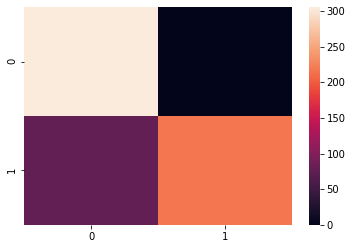

In [302]:
#Plot of the Confusion Matrix
ax = sns.heatmap(matrix)

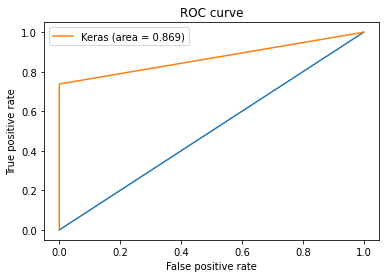

In [303]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y_test, Y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1])
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [304]:
# save model and architecture to single file
model.save("Keras_changed.h5")
print("Saved model to disk")

Saved model to disk
